## <font color='blue'> Import libraries </font> 

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from sklearn.cluster import Birch
import time
from collections import Counter
from sklearn.cluster import DBSCAN
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from random import sample
import plotly.io as pio

#pio.renderers
#pio.renderers.default = "svg"
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

## <font color='blue'> Read data </font> 

In [13]:
df_labeled=pd.read_csv('df_labeled.csv',index_col=0)
df_scaled=pd.read_csv('df_scaled.csv',index_col=0)
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [21]:
n_clust=3

## <font color='blue'> DBSCAN  </font> 

In [14]:

model = DBSCAN(eps=1.28, min_samples=6)#,algorithm= 'kd_tree')#, ‘kd_tree’, ‘brute’})
# fit model and predict clusters
yhat = model.fit_predict(df_scaled)
# retrieve unique clusters
clusters = np.unique(yhat)
list_clusts=[]
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)   
    list_clusts.append(row_ix)
print(list_clusts)
print(yhat)

[(array([  3,  11,  14,  15,  21,  23,  31,  32,  37,  38,  49,  55,  66,
        72,  73,  78,  81,  82,  87,  88,  89,  91,  98,  99, 101, 102,
       103, 107, 112, 113, 114, 115, 116, 123, 126, 128, 131, 132, 133,
       136, 137, 142, 145, 149, 150, 154, 157, 159, 163, 165], dtype=int64),), (array([  0,  17,  25,  26,  28,  36,  40,  50,  56,  59,  63,  64,  80,
        84,  93,  94,  97, 106, 129, 147, 155, 166], dtype=int64),), (array([  1,   2,   4,   5,   6,   9,  10,  12,  13,  16,  18,  19,  20,
        22,  24,  27,  30,  33,  34,  35,  39,  41,  42,  43,  45,  46,
        47,  48,  51,  52,  57,  61,  62,  65,  67,  69,  70,  71,  76,
        79,  83,  85,  86,  90,  92,  95,  96, 100, 104, 105, 108, 109,
       117, 118, 119, 120, 121, 124, 125, 127, 130, 134, 135, 138, 140,
       141, 143, 146, 148, 151, 152, 153, 156, 160, 161, 162, 164],
      dtype=int64),), (array([  7,   8,  29,  44,  53,  54,  58,  60,  68,  74,  75,  77, 110,
       111, 122, 139, 144, 158], dtyp

In [15]:

Counter(yhat)

Counter({0: 22, 1: 77, -1: 50, 2: 18})

In [16]:
df_labeled['label']=yhat

## <font color='blue'> DBSCAN labels plots  </font> 

In [17]:
import plotly.express as px
#df = px.data.tips()
#df_labeled.loc[:,"label"] = df_labeled.loc[:,"label"].astype(str)
fig = px.parallel_coordinates(df_labeled.iloc[:,1:],title='Features vs Labels: Interactive Plots',color='label')#,
                              #color_continuous_scale=px.colors.sequential.RdBu_r)
#color_discrete_sequence=["red", "blue", "black", "green"])# 
#fig.write_html("features_and_labels_plot_interactive.html")
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(coloraxis_colorbar=dict(title=df_labeled['label'].name),legend_title_text='Label', 
                 title_pad_l=300,title_y=0.98)        
#fig.write_html("features_and_labels_plot_interactive_dbscan.html")
#fig.write_image("features_and_labels_plot_interactive_dbscan.png",scale=3)
fig.show()

In [18]:
df_labeled.loc[:,'label'].astype(int)
df_labeled['label'].loc[df_labeled['label'] == 2 ]= 'No help needed'
df_labeled['label'].loc[df_labeled['label'] == 1 ]= 'Might need help'
df_labeled['label'].loc[df_labeled['label'] == 0 ]='Help needed'
df_labeled['label'].loc[df_labeled['label'] == -1 ]='Outliers'
df_labeled

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Help needed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Might need help
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Might need help
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Outliers
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Might need help
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Might need help
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Outliers
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Might need help
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Outliers


In [19]:
fig = px.choropleth(df_labeled[['country','label']],
                    locationmode='country names',
                    locations='country',
                     title='Needed Help Per Country (World)',
                    color=df_labeled['label'], 
                     #color_discrete_sequence=px.colors.sequential.Plasma
                    #color_discrete_sequence=px.colors.diverging.Earth
                    color_discrete_map={'No help needed':'Green',
                                        'Might need help':'Yellow',
                                        'Help needed':'Red',
                                       'Outliers':'Black'} )

fig.update_geos(fitbounds="locations", visible=True)
#fig.update_layout(coloraxis_colorbar=dict(title=df_labeled2['label'].name))
fig.update_layout(legend_title_text='Labels',legend_title_side='top',title_pad_l=260,title_y=0.86)
#fig.write_html("Needed Help Per Country (World).html")
#fig.write_image("Needed Help Per Country (World).png",scale=3)
fig.show()

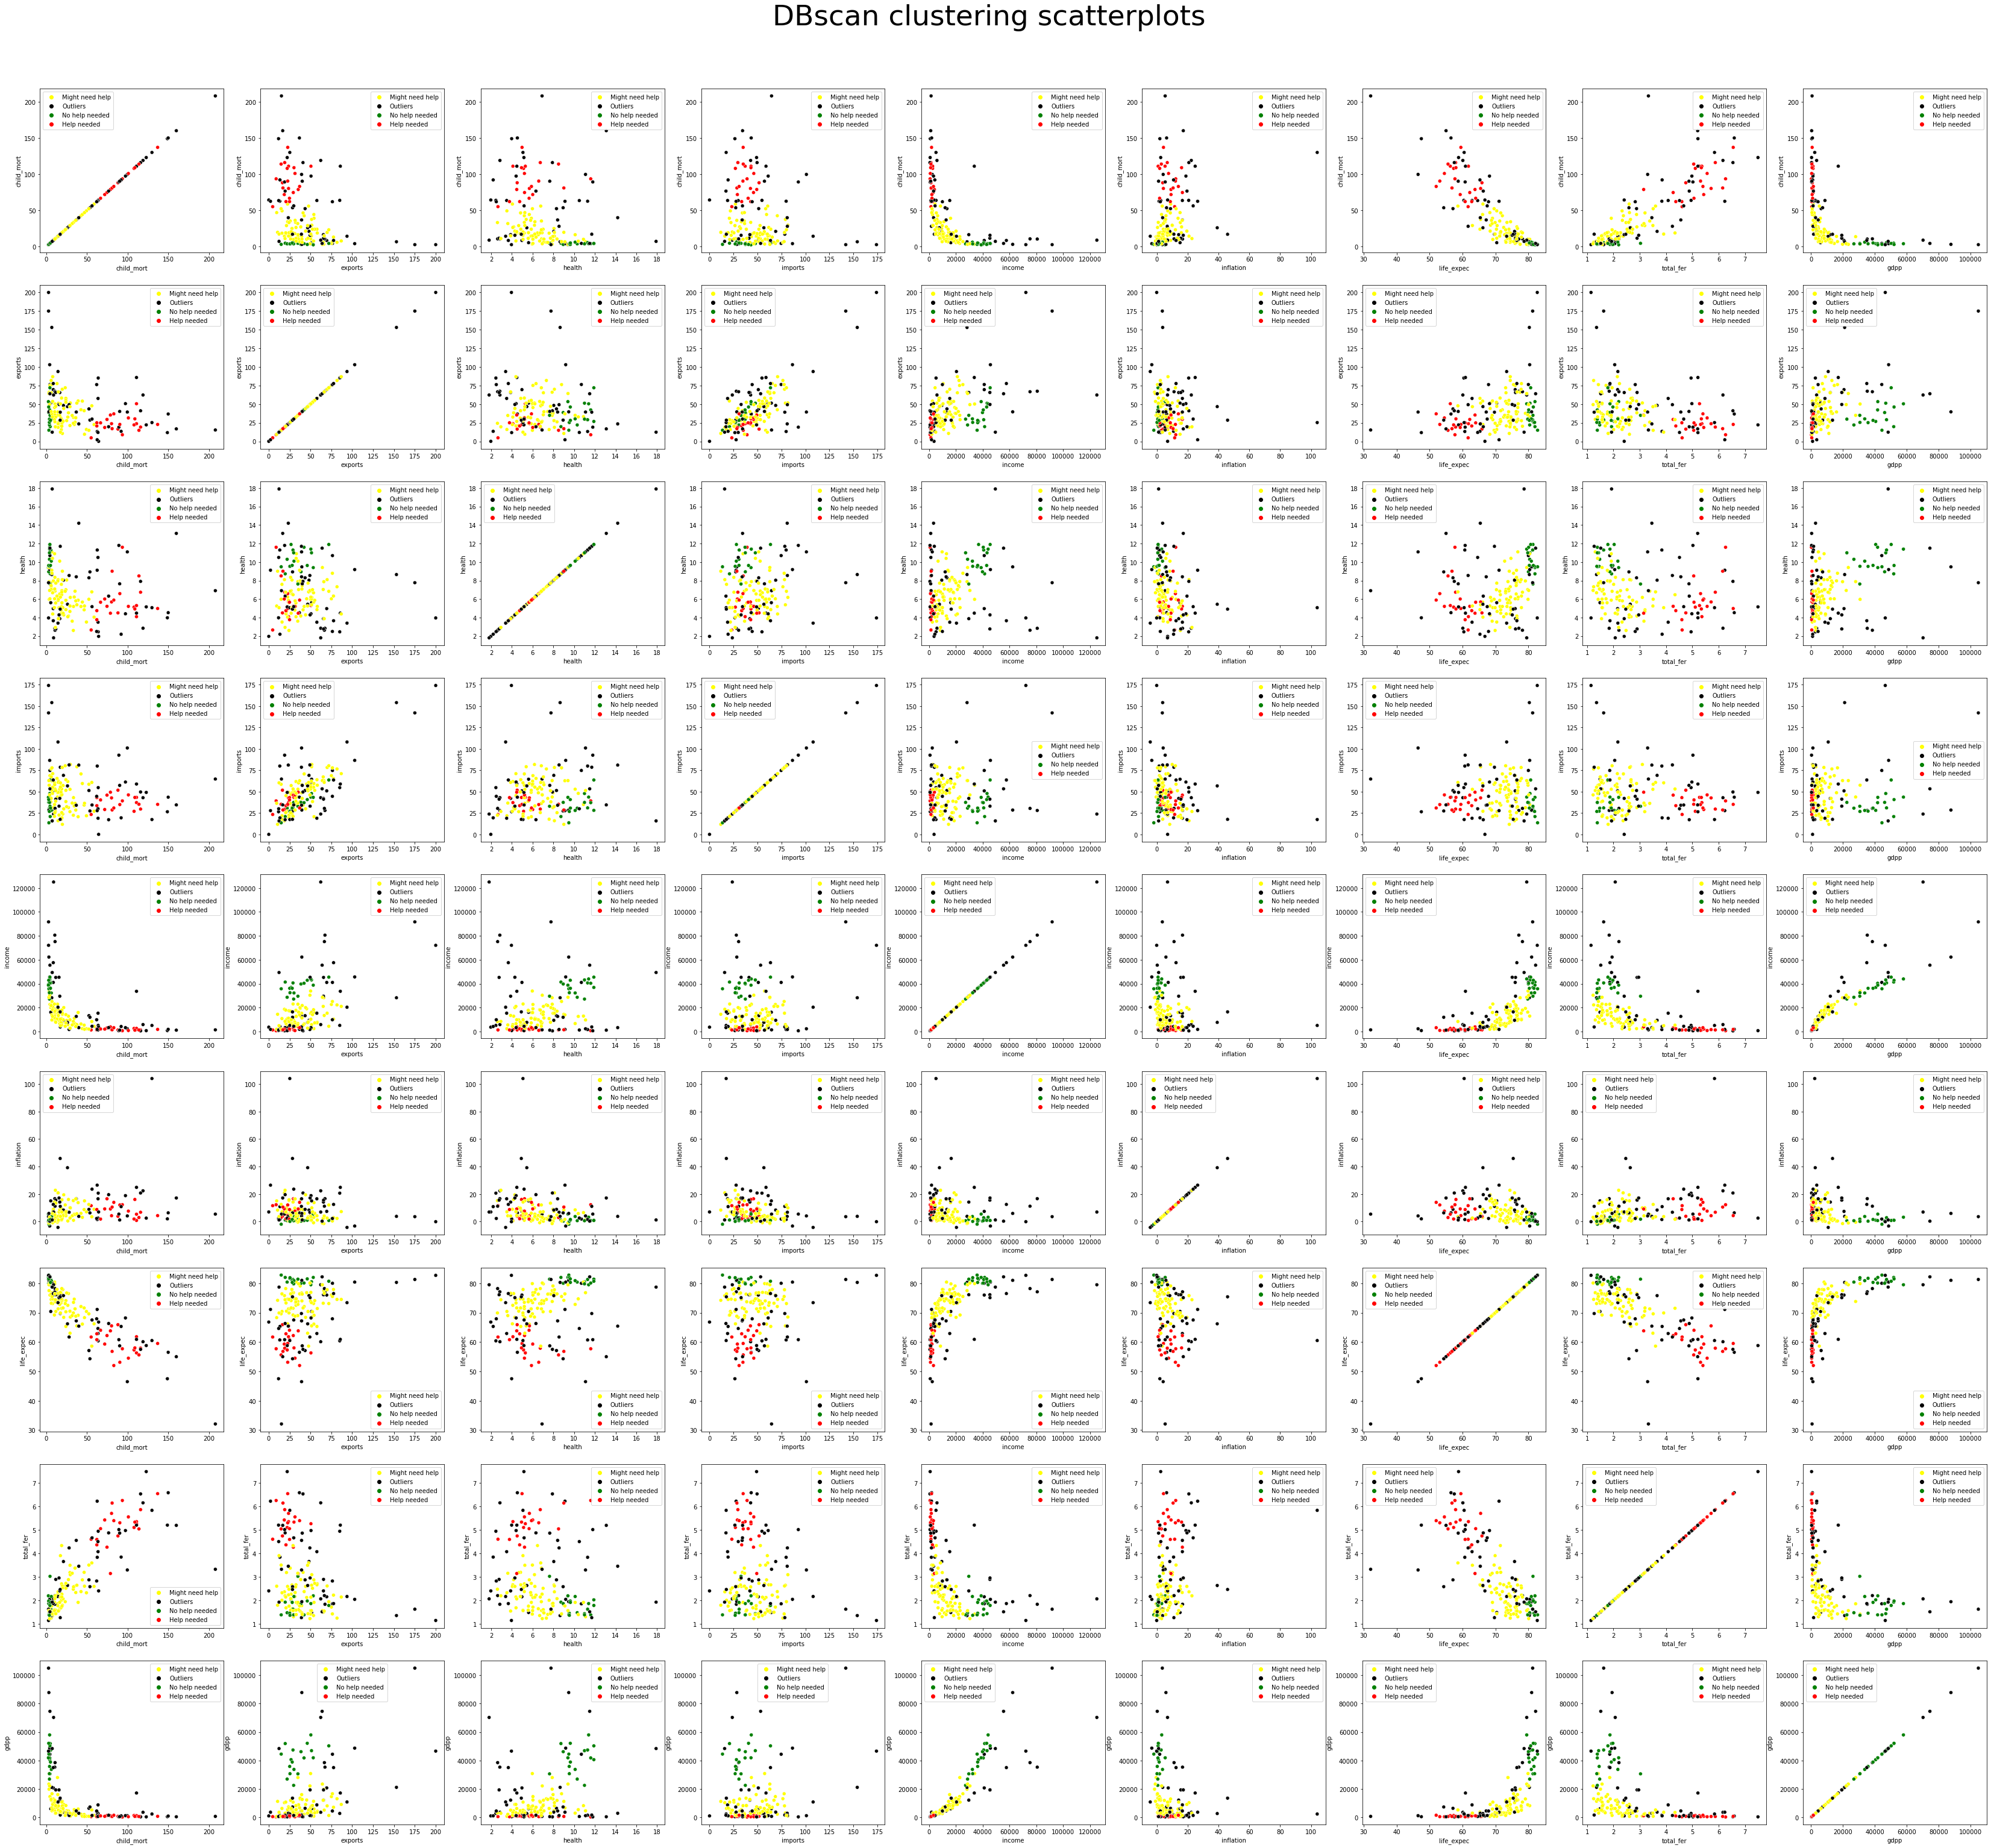

In [483]:
plt.figure(figsize = (71, 65))
plt.suptitle('DBscan clustering scatterplots',fontsize=47,y=0.91,x=0.433)
for j in range(len(df_labeled.iloc[1:].columns)-2):
    for i in range(len(df_labeled.iloc[1:].columns)-2):
        plt.subplot(len(df_labeled.iloc[1:].columns),len(df_labeled.iloc[1:].columns),i+1+j*len(df_labeled.iloc[1:].columns))
        g=sns.scatterplot(x = df_labeled.iloc[:,i+1], y = df_labeled.iloc[:,j+1], data = df_labeled[1:], hue = 'label', palette = ['yellow','black','green','red'])
        g.legend(fontsize=10)
#plt.legend(bbox_to_anchor =(0.65, 1.25))
#plt.savefig('DBscan clustering scatterplots.png',dpi=300, facecolor='w')
plt.show()

## <font color='blue'> Birch  </font> 

In [23]:

birch = Birch(threshold=0.81, n_clusters=n_clust)
# fit the model
birch.fit(df_scaled)
# assign a cluster to each example
yhat_birch = birch.predict(df_scaled)
# retrieve unique clusters
clusters = np.unique(yhat)
clusts=[]
for cluster in clusters:
    clust=np.where(yhat_birch==cluster)
    clusts.append(clust) # dataframes nested into a list
#cluster_instance=y_train[target].iloc[ind]
#    cluster_instances.append(cluster_instance)
#clust_results=reg_best_target.predict(X_train.iloc[ind])
 #   clusters.append(clust_results.tolist())
yhat_birch

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int64)

In [24]:
df_labeled['label']=yhat_birch

## <font color='blue'> Birch labels plots  </font> 

In [25]:
import plotly.express as px
#df = px.data.tips()
#df_labeled.loc[:,"label"] = df_labeled.loc[:,"label"].astype(str)
fig = px.parallel_coordinates(df_labeled.iloc[:,1:],title='Features vs Labels: Interactive Plots',color='label')#,
                              #color_continuous_scale=px.colors.sequential.RdBu_r)
#color_discrete_sequence=["red", "blue", "black", "green"])# 
#fig.write_html("features_and_labels_plot_interactive.html")
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(coloraxis_colorbar=dict(title=df_labeled['label'].name),legend_title_text='Label', 
                 title_pad_l=300,title_y=0.98)        
#fig.write_html("features_and_labels_plot_interactive_birch.html")
#fig.write_image("features_and_labels_plot_interactive_birch.png",scale=3)
fig.show()

In [26]:
df_labeled.loc[:,'label'].astype(int)
df_labeled['label'].loc[df_labeled['label'] == 2 ]= 'Might need help'
df_labeled['label'].loc[df_labeled['label'] == 1 ]= 'Help needed'
df_labeled['label'].loc[df_labeled['label'] == 0 ]='No help needed'
#df_labeled['label'].loc[df_labeled['label'] == -1 ]='Outliers'
df_labeled

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Help needed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Might need help
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Might need help
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Help needed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Might need help
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Might need help
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Might need help
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Might need help
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Help needed


In [27]:
fig = px.choropleth(df_labeled[['country','label']],
                    locationmode='country names',
                    locations='country',
                     title='Needed Help Per Country (World)',
                     #color_discrete_sequence=["orange", "red", "green",'black']
                    color=df_labeled['label'], 
                     #color_discrete_sequence=px.colors.sequential.Plasma
                    #color_discrete_sequence=px.colors.diverging.Earth
                    color_discrete_map={'Help needed':'Red',
                                        'Might need help':'Yellow',
                                        'No help needed':'Green'})#,
                                     #  -1:'Yellow'} )
fig.update_geos(fitbounds="locations", visible=True)
#fig.update_layout(coloraxis_colorbar=dict(title=df_labeled2['label'].name))
fig.update_layout(legend_title_text='Labels',legend_title_side='top',title_pad_l=260,title_y=0.86)

#fig.write_html("NeededHelpPerCountry(World)_birch.html")
#fig.write_image("NeededHelpPerCountry(World)_birch.png",scale=3)
fig.show()

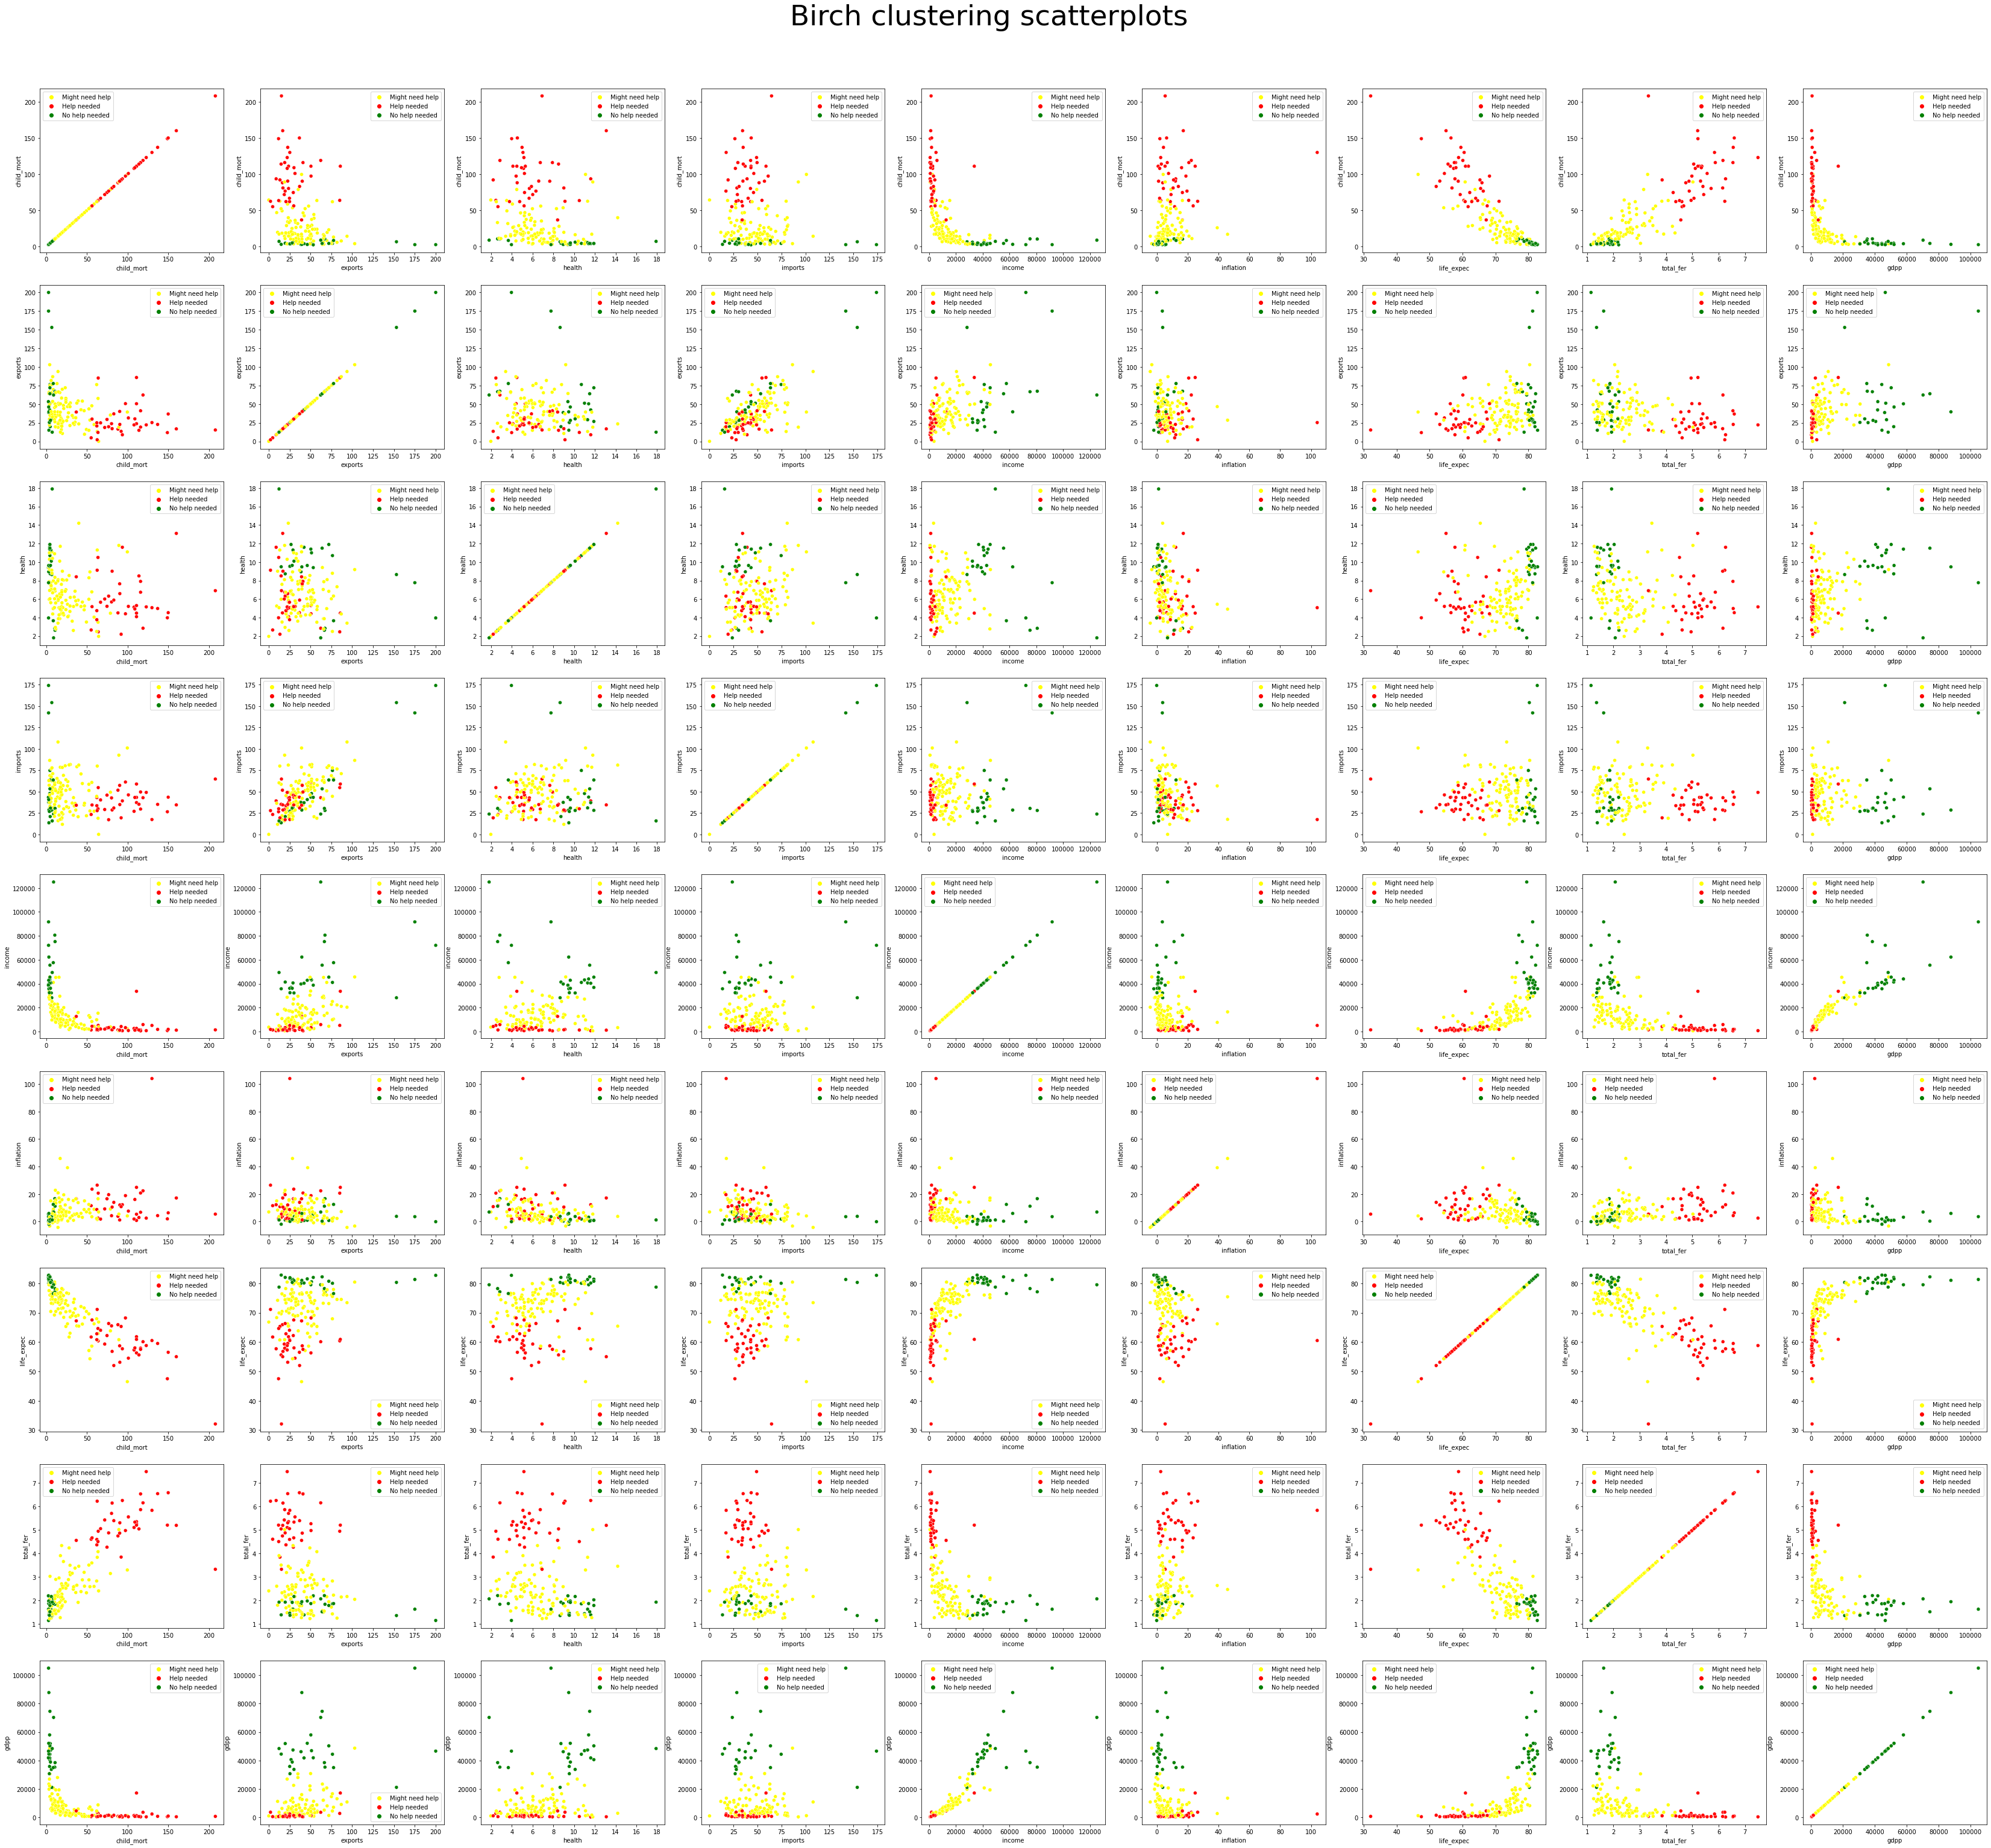

In [28]:
plt.figure(figsize = (71, 65))
plt.suptitle('Birch clustering scatterplots',fontsize=47,y=0.91,x=0.433)
for j in range(len(df_labeled.iloc[1:].columns)-2):
    for i in range(len(df_labeled.iloc[1:].columns)-2):
        plt.subplot(len(df_labeled.iloc[1:].columns),len(df_labeled.iloc[1:].columns),i+1+j*len(df_labeled.iloc[1:].columns))
        g=sns.scatterplot(x = df_labeled.iloc[:,i+1], y = df_labeled.iloc[:,j+1], data = df_labeled[1:], hue = 'label', palette = ['yellow','red','green'])
        g.legend(fontsize=10)
#plt.legend(bbox_to_anchor =(0.65, 1.25))
#plt.savefig('Birchclusteringscatterplots.png',dpi=600, facecolor='w')
plt.show()